In [1]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("datamunge/sign-language-mnist")

# print("Path to dataset files:", path)


100%|██████████| 62.6M/62.6M [00:10<00:00, 6.40MB/s]

Extracting files...


Path to dataset files: C:\Users\KIIT\.cache\kagglehub\datasets\datamunge\sign-language-mnist\versions\1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

df = pd.read_csv('sign_mnist_train.csv')
df_test = pd.read_csv('sign_mnist_test.csv')

x_train = df.iloc[0:27455, 1:785].values
y_train = df.iloc[0:27455, 0].values

x_test = df_test.iloc[0:7172, 1:785].values
y_test = df_test.iloc[0:7172,0].values

label_enc = LabelEncoder()
y_train = label_enc.fit_transform(y_train)
y_test = label_enc.fit_transform(y_test)

In [2]:
from sklearn.svm import SVC

classifier = SVC(decision_function_shape='ovr')

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='micro')
cm = confusion_matrix(y_test,y_pred)

print(cm)
print(f1)
print(acc)

[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 426   0   0   0   0   0   0   0   6   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 308   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 244   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0]
 [  0   0   0   0 495   0   0   0   0   0   0   0   0   0   0   0   0   3
    0   0   0   0   0   0]
 [  0   0  20   0   0 206   0   0   0   0  21   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 322   7   0   0   0   0   0   0   0   0   0   0
   19   0   0   0   0   0]
 [  0   0   0   0   0   0  20 412   0   0   0   0   0   0   0   0   0   0
    1   3   0   0   0   0]
 [  0   0   0   0   0   0   0   0 260   0   0   3   0   0   0   0   0   0
    2   0   0   0   0  23]
 [  0   0   0   0   0   0   0   0  21 194   0   0   0   0   0   0  47   0
    0  26   0  23

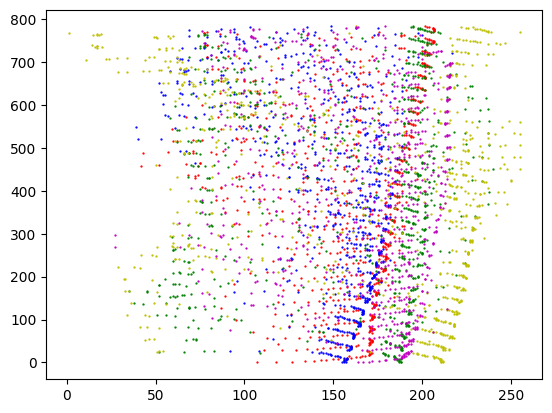

In [3]:
x_train = df.iloc[0:27455, 1:785].values
y_train = df.iloc[0:27455, 0].values

pixel_number = np.arange(0,784,1)

x_test = df_test.iloc[0:7172, 1:785].values
y_test = df_test.iloc[0:7172,0].values

plt.scatter(x_train[0],pixel_number, s=0.4, c = 'r')
plt.scatter(x_train[1],pixel_number, s=0.4, c = 'b')
plt.scatter(x_train[2],pixel_number, s=0.4, c = 'g')
plt.scatter(x_train[3],pixel_number, s=0.4, c = 'y')
plt.scatter(x_train[4],pixel_number, s=0.4, c = 'm')
plt.show()

label_enc = LabelEncoder()
y_train = label_enc.fit_transform(y_train)
y_test = label_enc.fit_transform(y_test)

In [5]:
# from sklearn.neighbors import KNeighborsClassifier

# KNN = KNeighborsClassifier(n_neighbors=165)
# classifier = KNN.fit(x_train,y_train)

# y_pred = classifier.predict(x_test)
# acc = accuracy_score(y_test,y_pred)
# f1 = f1_score(y_test,y_pred,average='micro')
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# print(f1)
# print(acc)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_data = pd.read_csv('sign_mnist_train/sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test/sign_mnist_test.csv')

In [16]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [17]:
train_data.label

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

In [18]:
X_train = train_data.drop("label", axis =1) 
y_train = train_data.label.values 


X_test = test_data.drop("label", axis =1) 
y_test = test_data.label.values

In [19]:
print(y_train.shape )

print(X_train.shape)

(27455,)
(27455, 784)


In [20]:
#  to aviod the problem because there is no class in number 9 so we shift the indices 
label_mapping = {
    0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8,
    10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15,
    17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23
}

# Remap the labels
y_train = np.array([label_mapping[label] for label in y_train])
y_test = np.array([label_mapping[label] for label in y_test])

In [21]:
X_train = X_train.values / 255.0
X_test = X_test.values / 255.0

# Reshape the data to fit the CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=24)
y_test = to_categorical(y_test, num_classes=24)

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [23]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(X_train)

In [24]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='softmax')
])

c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(X_val, y_val)
)

Epoch 1/20


c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


687/687 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.1087 - loss: 2.9668 - val_accuracy: 0.5811 - val_loss: 1.4582
Epoch 2/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.4342 - loss: 1.7102 - val_accuracy: 0.8204 - val_loss: 0.6330
Epoch 3/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.6012 - loss: 1.1428 - val_accuracy: 0.8769 - val_loss: 0.4121
Epoch 4/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.6727 - loss: 0.9283 - val_accuracy: 0.8918 - val_loss: 0.2932
Epoch 5/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7193 - loss: 0.7865 - val_accuracy: 0.8854 - val_loss: 0.3110
Epoch 6/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7574 - loss: 0.6755 - val_accuracy: 0.9457 - val_loss: 0.1701
Epoch 7/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7892 - loss: 0.6012 - val_accuracy: 0.9663 - val_loss: 0.1232
Epoch 8/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.8107 - loss: 0.5290 - val_accurac

In [27]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9892 - loss: 0.0283
Test Loss: 0.0292
Test Accuracy: 0.9887


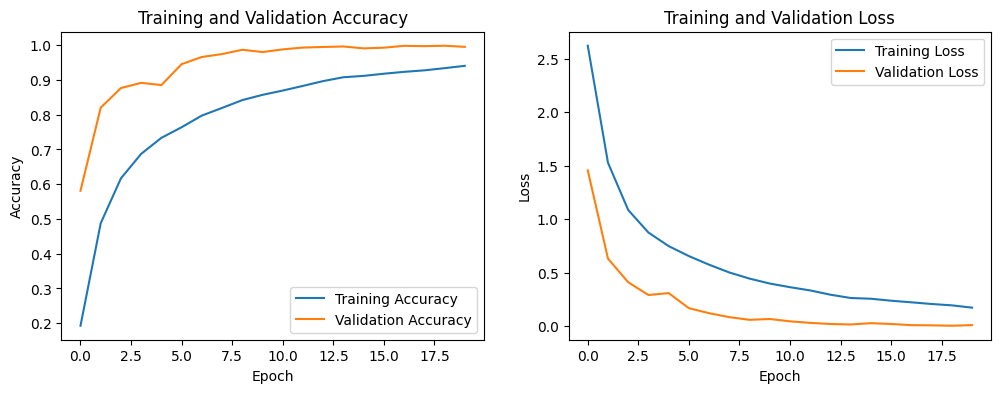

In [28]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [29]:
model.save('sign_language_cnn_model.h5')